In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import regex as re
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing,model_selection
from sklearn.metrics import r2_score



<Axes: >

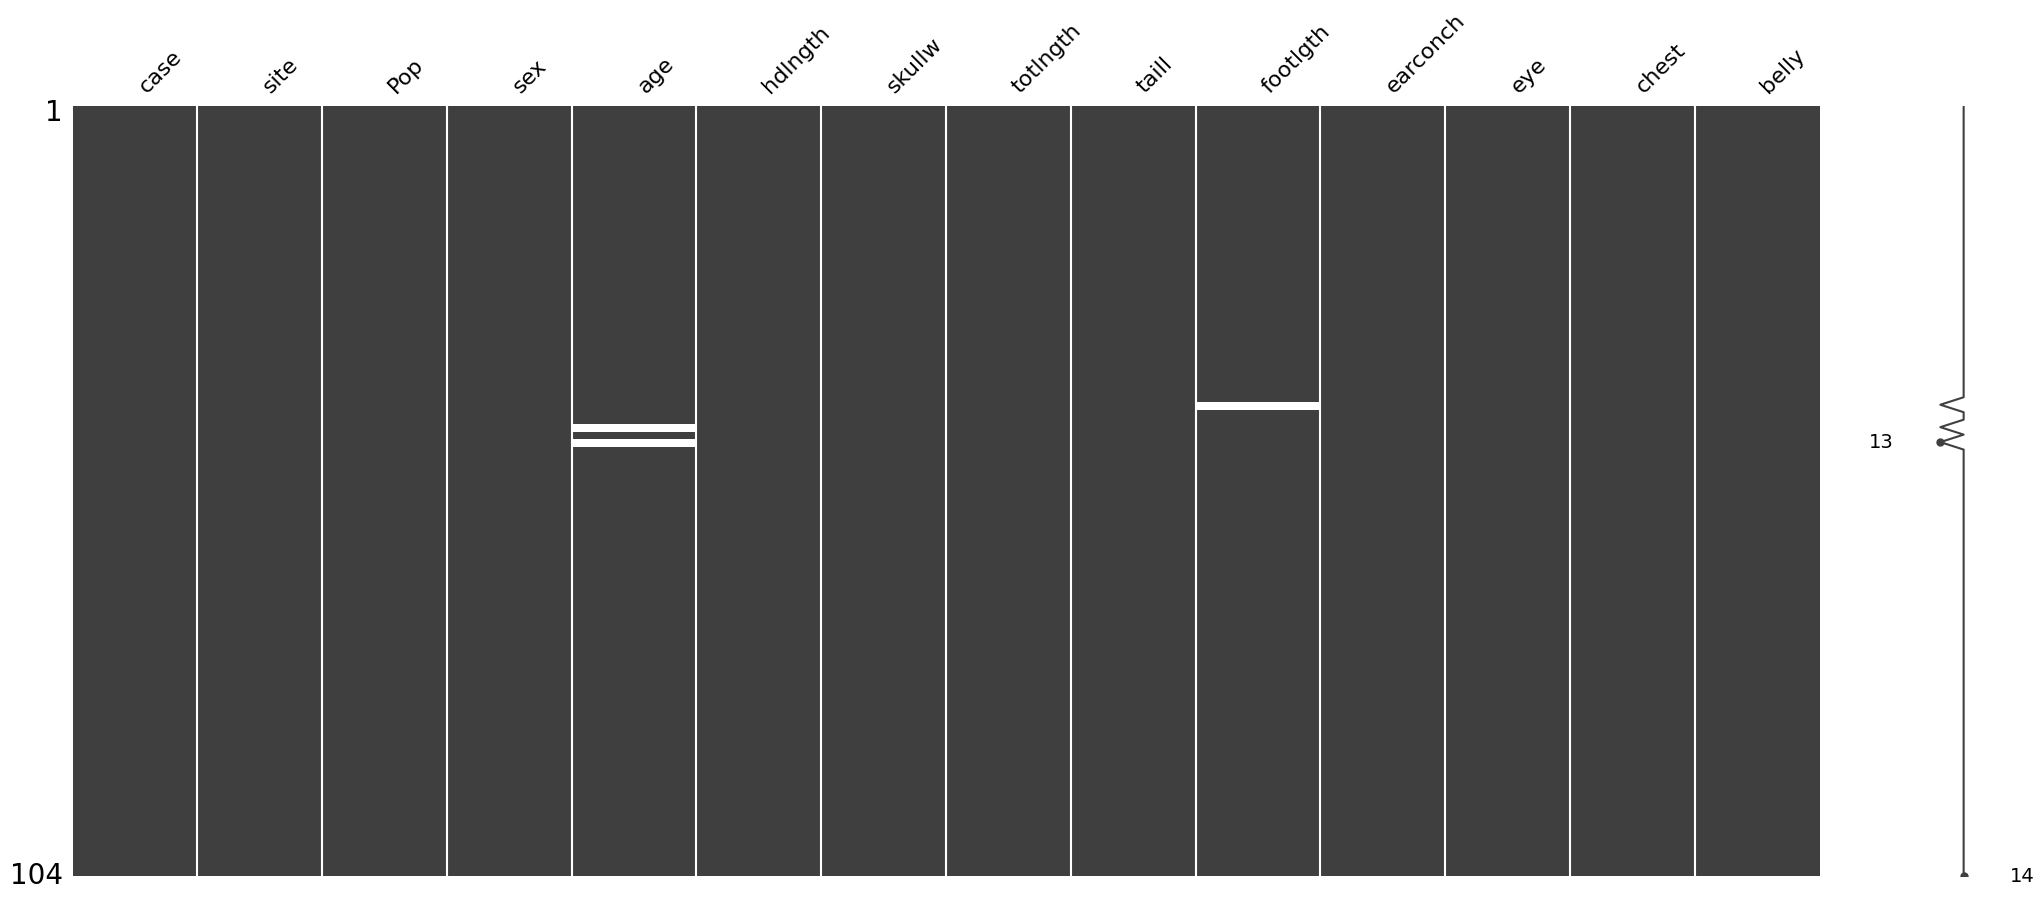

In [2]:
df=pd.read_csv("possum.csv")
msno.matrix(df)

In [3]:
df.dropna()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


<Axes: >

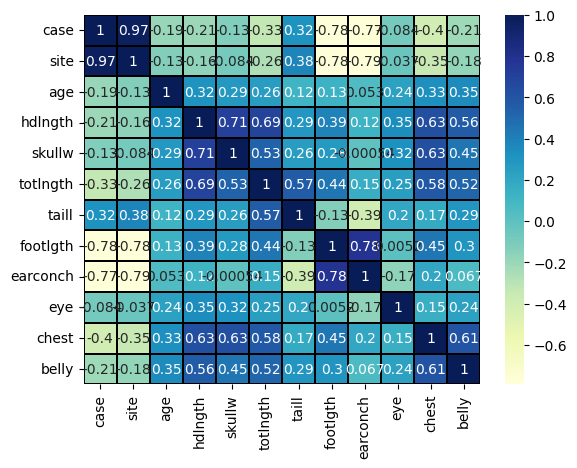

In [4]:
analysis_df = df.drop(['sex', 'Pop'], axis=1)
sns.heatmap(analysis_df.corr(), annot=True, cmap="YlGnBu", linewidths=0.1, linecolor='black')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [6]:
df=df.drop(['case', 'site','earconch'], axis=1)

In [7]:
df = pd.get_dummies(df, columns=['Pop', 'sex'])

In [8]:
df.head()

,age,hdlngth,skullw,totlngth,taill,footlgth,eye,chest,belly,Pop_Vic,Pop_other,sex_f,sex_m
0,8.0,94.1,60.4,89.0,36.0,74.5,15.2,28.0,36.0,True,False,False,True
1,6.0,92.5,57.6,91.5,36.5,72.5,16.0,28.5,33.0,True,False,True,False
2,6.0,94.0,60.0,95.5,39.0,75.4,15.5,30.0,34.0,True,False,True,False
3,6.0,93.2,57.1,92.0,38.0,76.1,15.2,28.0,34.0,True,False,True,False
4,2.0,91.5,56.3,85.5,36.0,71.0,15.1,28.5,33.0,True,False,True,False


In [9]:
df.tail()

,age,hdlngth,skullw,totlngth,taill,footlgth,eye,chest,belly,Pop_Vic,Pop_other,sex_f,sex_m
99,1.0,89.5,56.0,81.5,36.5,66.0,14.8,23.0,27.0,False,True,False,True
100,1.0,88.6,54.7,82.5,39.0,64.4,14.0,25.0,33.0,False,True,False,True
101,6.0,92.4,55.0,89.0,38.0,63.5,13.0,25.0,30.0,False,True,True,False
102,4.0,91.5,55.2,82.5,36.5,62.9,15.4,25.0,29.0,False,True,False,True
103,3.0,93.6,59.9,89.0,40.0,67.6,14.8,28.5,33.5,False,True,True,False


In [10]:
normalize = ['age', 'hdlngth','skullw','totlngth','taill','footlgth','eye','chest','belly']

scaler = preprocessing.MinMaxScaler()

df[normalize ] = scaler.fit_transform(df[normalize ])

In [11]:
df.head()

,age,hdlngth,skullw,totlngth,taill,footlgth,eye,chest,belly,Pop_Vic,Pop_other,sex_f,sex_m
0,0.875,0.563107,0.559140,0.651163,0.363636,0.806818,0.48,0.60,0.733333,True,False,False,True
1,0.625,0.485437,0.408602,0.767442,0.409091,0.693182,0.64,0.65,0.533333,True,False,True,False
2,0.625,0.558252,0.537634,0.953488,0.636364,0.857955,0.54,0.80,0.600000,True,False,True,False
3,0.625,0.519417,0.381720,0.790698,0.545455,0.897727,0.48,0.60,0.600000,True,False,True,False
4,0.125,0.436893,0.338710,0.488372,0.363636,0.607955,0.46,0.65,0.533333,True,False,True,False


<Axes: >

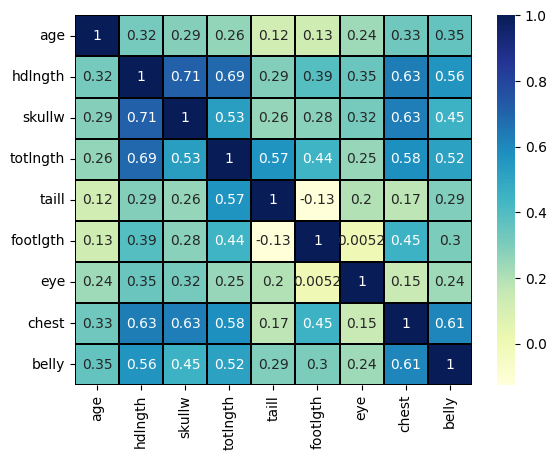

In [12]:
analysis_df = df.drop(['Pop_Vic', 'Pop_other','sex_f','sex_m'], axis=1)
sns.heatmap(analysis_df.corr(), annot=True, cmap="YlGnBu", linewidths=0.1, linecolor='black')